In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



In [6]:
df =  pd.read_csv('/cxldata/datasets/project/ny_stock_prediction/prices-split-adjusted.csv', header=0)
df.head()

print(df.shape)

df.symbol.unique()


(851264, 7)


array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [7]:
df_yahoo = df[df['symbol']=='YHOO']

print(df_yahoo.shape)

df_yahoo.head(10)


(1762, 7)


,date,symbol,open,close,low,high,volume
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0
3053,2010-01-11,YHOO,16.770000,16.740000,16.480000,16.830000,16181900.0
3521,2010-01-12,YHOO,16.650000,16.680000,16.600000,16.860001,15672400.0
3989,2010-01-13,YHOO,16.879999,16.900000,16.650000,16.980000,16955600.0
4457,2010-01-14,YHOO,16.809999,17.120001,16.799999,17.230000,16715600.0
4925,2010-01-15,YHOO,17.250000,16.820000,16.750000,17.250000,18415000.0


In [8]:
df_yahoo.describe()
df_yahoo.isnull().sum()


date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [9]:
df_yahoo['date']= pd.to_datetime(df_yahoo['date'])

print(df_yahoo.date.dtype)

df_yahoo = df_yahoo.set_index("date")

df_yahoo.head()


datetime64[ns]


/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


In [10]:
print(df_yahoo.shape)

yahoo_data = df_yahoo.asfreq('b')
print(yahoo_data.shape)

yahoo_data.tail(30)

yahoo_data.isnull().sum()


(1762, 6)
(1825, 6)


symbol    63
open      63
close     63
low       63
high      63
volume    63
dtype: int64

In [11]:
null_data = yahoo_data[yahoo_data.isnull().any(axis=1)]

null_data.head()

null_dates = null_data.index.tolist()


In [12]:
import calendar
import datetime

holidays = []

for date in null_dates:
    week, day, month, year = date.weekday(), date.day, date.month, date.year
    week_day = calendar.day_name[week]

    if month==1:
        if day==1:
            # New year day
            holidays.append(date)
        elif day==2 and week_day=='Monday':
            # Observed New Year Day
            holidays.append(date)
        elif day>=15 and day<=21 and week_day=='Monday':
            # Martin Luther King, Jr. Day
            holidays.append(date)

    elif month==2:
        # Washington's Birthday
        if day>=15 and day<=21 and week_day=='Monday':
            holidays.append(date)

    elif month==5:
        # Memorial day
        if day>=25 and day<=31 and week_day=='Monday':
            holidays.append(date)

    elif month==7:
        # Independence day
        if day==4:
            holidays.append(date)
        # Observed Independence  Day
        elif day==5 and week_day=='Monday':
            holidays.append(date)
        elif day==3 and week_day=='Friday':
            holidays.append(date)

    elif month == 9:
        # Labour day
        if day>=1 and day<=7 and week_day=='Monday':
            holidays.append(date)

    elif month==11:
        # Thanksgiving Day
        if week_day=='Thursday' and day>=22 and day<=28:
            holidays.append(date)

    elif month==12:
        # Christmas Day
        if day==25:
            holidays.append(date)
        # Observed Christmas Day
        elif day==24 and week_day=='Friday':
            holidays.append(date)
        elif day==26 and week_day=='Monday':
            holidays.append(date)

good_fridays = [ datetime.date(2010,4,2), datetime.date(2011,4,22), datetime.date(2012,4,6), datetime.date(2013,3,29), datetime.date(2014,4,18), datetime.date(2015,4,3), datetime.date(2016,3,25) ]
holidays = holidays + [pd.to_datetime(date) for date in good_fridays]

non_holidays = [x for x in null_dates if x not in holidays]
print(non_holidays)


[Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00')]


In [13]:
print(yahoo_data.shape)

modified_df = yahoo_data.drop(holidays)
modified_df.shape


(1825, 6)


(1764, 6)

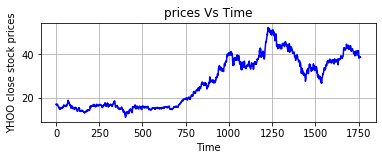

In [14]:
def plotter(code):
    global closing_stock
    plt.subplot(211)
    company_close = modified_df[modified_df['symbol']==code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show()

plotter("YHOO")


In [15]:
n_train = int(len(closing_stock) * 0.80)
n_remaining = len(closing_stock) - n_train

n_val = int(n_remaining*0.50)
n_test = n_remaining - n_val 
print("Train samples:",n_train, "Validation Samples:",n_val,"Test Samples:", n_test)

train_data = closing_stock[0:n_train]
print(train_data.shape)

val_data = closing_stock[n_train:n_train + n_val]
print(val_data.shape)

test_data = closing_stock[n_train + n_val:]
print(test_data.shape)


Train samples: 1409 Validation Samples: 176 Test Samples: 177
(1409, 1)
(176, 1)
(177, 1)


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

train = scaler.fit_transform(train_data)
val = scaler.transform(val_data)
test = scaler.transform(test_data)
